# Prediction of Survival of Breast cancer surgery patient - Using a Decision tree classifier

This project utilizes the Haberman's survival dataset from the UCL website to to build a decison tree clasifier. We will train the model to predict a patient's survival rate based on a set of attributes.We will vary the maxDepths and determine at what max depth is the model giving the best possible accuracy on test data.

The haberman's dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breastcancer.
it contains 306 instances.


### Attribute Information

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year


Missing attribute Values: None

In [2]:
import pandas as pd

In [6]:
df=pd.read_csv('haberman.txt',sep=',',names=['Age','Year_of_operation','No._of_postive_axill_nodes','survival_status'])

In [7]:
df.head()

,Age,Year_of_operation,No._of_postive_axill_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [8]:
df.sample(10)

,Age,Year_of_operation,No._of_postive_axill_nodes,survival_status
296,72,67,3,1
73,44,64,6,2
302,76,67,0,1
4,31,65,4,1
179,54,62,0,1
130,50,58,1,1
197,57,61,5,2
222,59,67,3,1
195,56,67,0,1
40,40,58,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         306 non-null    int64
 1   Year_of_operation           306 non-null    int64
 2   No._of_postive_axill_nodes  306 non-null    int64
 3   survival_status             306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [10]:
df.describe()

,Age,Year_of_operation,No._of_postive_axill_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [ ]:
# Extract the predictor and the target class

In [13]:

y=df['survival_status']

In [14]:
y

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: survival_status, Length: 306, dtype: int64

In [17]:
type(y)

pandas.core.series.Series

In [16]:
y.dtype

dtype('int64')

In [18]:
x=df.drop(['survival_status'], axis=1)

In [19]:
type(x)

pandas.core.frame.DataFrame

In [21]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         306 non-null    int64
 1   Year_of_operation           306 non-null    int64
 2   No._of_postive_axill_nodes  306 non-null    int64
dtypes: int64(3)
memory usage: 7.3 KB


In [11]:
# train using 80% and 20% testing
# vary depth of the tree
#check the accuracy of the tree

In [12]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
x_train

,Age,Year_of_operation,No._of_postive_axill_nodes
62,43,58,52
111,48,62,2
298,73,68,0
159,53,60,9
117,49,62,0
...,...,...,...
203,57,62,0
255,64,66,0
72,43,66,4
235,61,65,8


In [24]:
x_test

,Age,Year_of_operation,No._of_postive_axill_nodes
89,46,58,2
58,42,61,4
70,43,63,2
305,83,58,2
112,48,64,0
...,...,...,...
154,52,65,0
0,30,64,1
251,63,61,9
78,44,61,0


In [25]:
y_train

62     2
111    1
298    1
159    2
117    1
      ..
203    1
255    1
72     1
235    1
37     1
Name: survival_status, Length: 244, dtype: int64

In [26]:
y_train

62     2
111    1
298    1
159    2
117    1
      ..
203    1
255    1
72     1
235    1
37     1
Name: survival_status, Length: 244, dtype: int64

In [27]:
from sklearn import tree

In [28]:
from sklearn.metrics import accuracy_score

In [52]:
import numpy as np

In [29]:
# model fitting and evaluation

In [76]:
maxDepths=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [77]:
trainAcc=np.zeros(len(maxDepths))

In [78]:
trainAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [79]:
testAcc=np.zeros(len(maxDepths))

In [80]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
index=0

In [82]:
type(index)

int

In [83]:
# getting model predictions with varying depths
for depth in maxDepths:
    clf=tree.DecisionTreeClassifier(max_depth=depth)
    clf=clf.fit(x_train,y_train)
    y_predTrain=clf.predict(x_train)
    y_predTest=clf.predict(x_test)
    trainAcc[index]=accuracy_score(y_train,y_predTrain)
    testAcc[index]=accuracy_score(y_test,y_predTest)
    index+=1

In [84]:
trainAcc

array([0.75      , 0.7704918 , 0.78688525, 0.79918033, 0.81147541,
       0.83196721, 0.85655738, 0.88934426, 0.89344262, 0.90983607,
       0.95491803, 0.97540984, 0.97540984, 0.97131148, 0.97540984])

In [85]:
testAcc

array([0.70967742, 0.77419355, 0.74193548, 0.75806452, 0.72580645,
       0.72580645, 0.67741935, 0.70967742, 0.66129032, 0.62903226,
       0.64516129, 0.62903226, 0.66129032, 0.64516129, 0.69354839])

In [88]:
# plot of train and test prediction accuracies
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy')

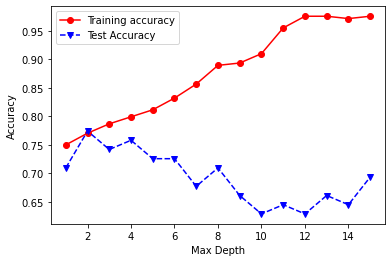

In [90]:
plt.plot(maxDepths,trainAcc, 'ro-', maxDepths,testAcc,'bv--')
plt.legend(['Training accuracy', 'Test Accuracy'])
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

In [91]:
max(testAcc)

0.7741935483870968

Conclusion
The best max depth to train the model with is 2, which gives an accuracy of 0.7741935483870968 on test dataset